# AirLine Data Prediction Project

we have flight row data in excel file. we use this data to analys and find meaning full insides from this row data so which is usefull for org. to use it.

### We will solve most of those challenges that we often face in real world..
### we will focus primarily on each & every part of data science life-cycle..


###### Life- Cycle of Data Science Project :
##### a) Data collection
##### b) Perform Data Cleaning / Data Preparation / Data Pre-processing 
##### c) Data visuaslisation(EDA)
#####  d) Perform feature engineering
#####     I)  Feature encoding
#####    II) checking outliers & impute it..
#####     III)Feature selection or feature importance
        
##### e) build machine leaning model & dump it..
#####   f) Automate ML Pipeline 
#####    g) hypertune ml model..along with cross validation

# first import librarys which is required for data cleaning, processing and visulization

In [377]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [378]:
import plotly
import cufflinks as cf
from cufflinks.offline import go_offline
from plotly.offline import plot , iplot , init_notebook_mode , download_plotlyjs
init_notebook_mode(connected=True)
cf.go_offline()
## to make visulization more informatic and effective so we use this library plotly and cufflinks

#  lets import our data

In [379]:
flight_train_data = pd.read_excel('Data_Train.xlsx')

In [380]:
flight_train_data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [381]:
flight_train_data.tail()

Airline Date_of_Journey    Source Destination  \
10678     Air Asia       9/04/2019   Kolkata    Banglore   
10679    Air India      27/04/2019   Kolkata    Banglore   
10680  Jet Airways      27/04/2019  Banglore       Delhi   
10681      Vistara      01/03/2019  Banglore   New Delhi   
10682    Air India       9/05/2019     Delhi      Cochin   

                       Route Dep_Time Arrival_Time Duration Total_Stops  \
10678              CCU → BLR    19:55        22:25   2h 30m    non-stop   
10679              CCU → BLR    20:45        23:20   2h 35m    non-stop   
10680              BLR → DEL    08:20        11:20       3h    non-stop   
10681              BLR → DEL    11:30        14:10   2h 40m    non-stop   
10682  DEL → GOI → BOM → COK    10:55        19:15   8h 20m     2 stops   

      Additional_Info  Price  
10678         No info   4107  
10679         No info   4145  
10680         No info   7229  
10681         No info  12648  
10682         No info  11753

In [382]:
flight_train_data.info() # to get detail information about our data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## now first we checking null or missing values in our data if we have lets deal with it.

In [383]:
flight_train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [384]:
flight_train_data[flight_train_data['Total_Stops'].isnull()]

Airline Date_of_Journey Source Destination Route Dep_Time  \
9039  Air India       6/05/2019  Delhi      Cochin   NaN    09:45   

      Arrival_Time Duration Total_Stops Additional_Info  Price  
9039  09:25 07 May  23h 40m         NaN         No info   7480

##### as we seen we have only two missing data in one row Route and Total_stops. we have very very low missing values that will not impact our data so lets remove that row.

In [385]:
flight_train_data.dropna(inplace = True)

In [386]:
flight_train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Now we dont have misssing value or data in our dataset so we have to move for next step

##  First we have to create copy of out original data so if something wrong with our data calculation and processing our original data will remain safe

In [387]:
data = flight_train_data.copy()

In [388]:
data.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1  Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662

In [389]:
data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [516]:
## as we seen our data we have Date_of_Journey	
## columns as object data type and we have to convert in dateTime format so it will eassy for our analysis

#  Lets Perform Data Pre-process & extract Derived attributes from "Date_of_Journey"
    lets extract derived attributes from "Date_of_Journey" & fetch day , month , year !

In [391]:
data.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1  Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662

In [392]:
def chage_date_time(col):
    data[col] = pd.to_datetime(data[col])

In [393]:
for feature in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    chage_date_time(feature)

In [394]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')  # to ignore unwanted warnings

In [395]:
data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

In [396]:
data['Journey_day'] = data['Date_of_Journey'].dt.day
data['Journey_date'] = data['Date_of_Journey'].dt.year
data['Journey_month'] = data['Date_of_Journey'].dt.month

In [397]:
data.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   

             Dep_Time        Arrival_Time Duration Total_Stops  \
0 2024-07-03 22:20:00 2024-03-22 01:10:00   2h 50m    non-stop   
1 2024-07-03 05:50:00 2024-07-03 13:15:00   7h 25m     2 stops   

  Additional_Info  Price  Journey_day  Journey_date  Journey_month  
0         No info   3897           24          2019              3  
1         No info   7662            1          2019              5

# Lets try to clean Dep_Time & Arrival_Time & then extract Derived attributes ..

In [398]:
def extract_time(df , col):
    df[col+'_minutes'] = df[col].dt.minute
    df[col+'_hours'] = df[col].dt.hour

In [399]:
extract_time(data,'Dep_Time')

In [400]:
extract_time(data,'Arrival_Time')

In [401]:
data.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   

             Dep_Time        Arrival_Time Duration Total_Stops  \
0 2024-07-03 22:20:00 2024-03-22 01:10:00   2h 50m    non-stop   
1 2024-07-03 05:50:00 2024-07-03 13:15:00   7h 25m     2 stops   

  Additional_Info  Price  Journey_day  Journey_date  Journey_month  \
0         No info   3897           24          2019              3   
1         No info   7662            1          2019              5   

   Dep_Time_minutes  Dep_Time_hours  Arrival_Time_minutes  Arrival_Time_hours  
0                20              22                    10                   1  
1                50               5                    15                  13

In [402]:
data.drop('Dep_Time',axis=1,inplace=True)

In [403]:
data.drop('Arrival_Time',axis=1,inplace=True)

In [404]:
data.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Duration Total_Stops Additional_Info  Price  Journey_day  Journey_date  \
0   2h 50m    non-stop         No info   3897           24          2019   
1   7h 25m     2 stops         No info   7662            1          2019   

   Journey_month  Dep_Time_minutes  Dep_Time_hours  Arrival_Time_minutes  \
0              3                20              22                    10   
1              5                50               5                    15   

   Arrival_Time_hours  
0                   1  
1                  13

In [405]:
data.dtypes

Airline                         object
Date_of_Journey         datetime64[ns]
Source                          object
Destination                     object
Route                           object
Duration                        object
Total_Stops                     object
Additional_Info                 object
Price                            int64
Journey_day                      int32
Journey_date                     int32
Journey_month                    int32
Dep_Time_minutes                 int32
Dep_Time_hours                   int32
Arrival_Time_minutes             int32
Arrival_Time_hours               int32
dtype: object

In [406]:
data.shape

(10682, 16)

In [407]:
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_date', 'Journey_month', 'Dep_Time_minutes', 'Dep_Time_hours',
       'Arrival_Time_minutes', 'Arrival_Time_hours'],
      dtype='object')

# lets analyse when will most of the flights take-off

In [408]:
def flight_departure_time(x):
    if (x>4) and (x<=8):
        return 'Early Morning Time'
    elif (x>8) and (x<=12):
        return 'Morning Time'
    elif (x>12) and (x<=16):
        return 'Afternoon Time'
    elif (x>16) and (x<=20):
        return 'Evening Time'
    elif (x>20) and (x<=24):
        return 'Night Time'
    else:
        return 'late Night'
    

<Axes: xlabel='Dep_Time_hours'>

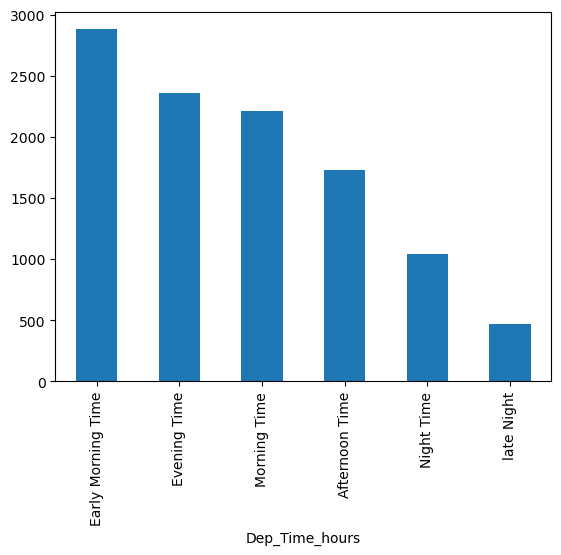

In [409]:
data['Dep_Time_hours'].apply(flight_departure_time).value_counts().plot(kind = 'bar')

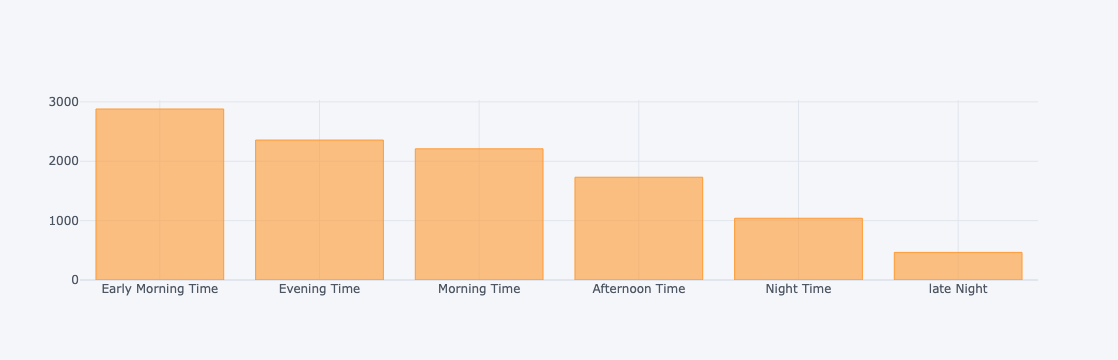

In [410]:
data['Dep_Time_hours'].apply(flight_departure_time).value_counts().iplot(kind = 'bar')

In [ ]:
# as we seen early morning 1 am to 4 am mostly flights are take off

In [411]:
data.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Duration Total_Stops Additional_Info  Price  Journey_day  Journey_date  \
0   2h 50m    non-stop         No info   3897           24          2019   
1   7h 25m     2 stops         No info   7662            1          2019   

   Journey_month  Dep_Time_minutes  Dep_Time_hours  Arrival_Time_minutes  \
0              3                20              22                    10   
1              5                50               5                    15   

   Arrival_Time_hours  
0                   1  
1                  13

# Lets Apply pre-processing on duration column
-->> Once we pre-processed our Duration feature , lets extract Duration hours and minute from duration..

-->> As my ML model is not able to understand this duration as it contains string values , 
thats why we have to tell our ML Model that this is hour & this is minute for each of the row ..

In [413]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h' + ' ' + x
    elif 'm' not in x:
        x = x + ' ' +'0m'
        
    return x

In [414]:
data['Duration'] = data['Duration'].apply(preprocess_duration)

In [415]:
data['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [416]:
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   

  Duration Total_Stops Additional_Info  Price  Journey_day  Journey_date  \
0   2h 50m    non-stop         No info   3897           24          2019   
1   7h 25m     2 stops         No info   7662            1          2019   
2   19h 0m     2 stops         No info  13882            9          2019   
3   5h 25m      1 stop         No info   6218           12          2019   
4   4h 45m      1 stop         No info  13302            1          2019   

   Journey_month  Dep_Time_minutes  Dep_Time_hours  Arrival_Time_minutes  \
0              3                20              22                    10   
1              5                50               5                    15   
2              6                25               9                    25   
3              5                 5              18                    30   
4              3                50              16                    35   

   Arrival_Time_hours  
0                   1  
1                  13  
2                   4  
3                  23  
4                  21

In [417]:
data['Duration_hours'] = data['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [418]:
data['Duration_minutes']=data['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [419]:
data.head()

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   

  Duration Total_Stops Additional_Info  Price  Journey_day  Journey_date  \
0   2h 50m    non-stop         No info   3897           24          2019   
1   7h 25m     2 stops         No info   7662            1          2019   
2   19h 0m     2 stops         No info  13882            9          2019   
3   5h 25m      1 stop         No info   6218           12          2019   
4   4h 45m      1 stop         No info  13302            1          2019   

   Journey_month  Dep_Time_minutes  Dep_Time_hours  Arrival_Time_minutes  \
0              3                20              22                    10   
1              5                50               5                    15   
2              6                25               9                    25   
3              5                 5              18                    30   
4              3                50              16                    35   

   Arrival_Time_hours  Duration_hours  Duration_minutes  
0                   1               2                50  
1                  13               7                25  
2                   4              19                 0  
3                  23               5                25  
4                  21               4                45

## CHECK-1 lets see duration of flight will impact on price of flight or not

In [420]:
data['Duration'] ## convert duration into total minutes duration ..

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [421]:
data['Duration_IN_minutes'] = data['Duration'].str.replace('h','*60').str.replace(' ', '+').str.replace('m','*1').apply(eval)

In [422]:
data['Duration_IN_minutes'] ## now we have duration is in minutes

0         170
1         445
2        1140
3         325
4         285
         ... 
10678     150
10679     155
10680     180
10681     160
10682     500
Name: Duration_IN_minutes, Length: 10682, dtype: int64

<Axes: xlabel='Duration_IN_minutes', ylabel='Price'>

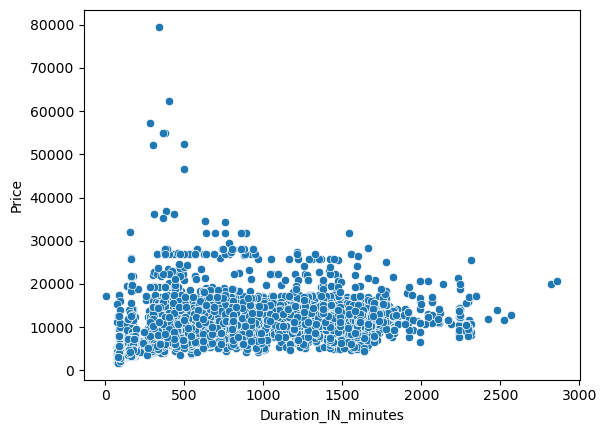

In [423]:
sns.scatterplot(x = 'Duration_IN_minutes',y='Price',data=data)

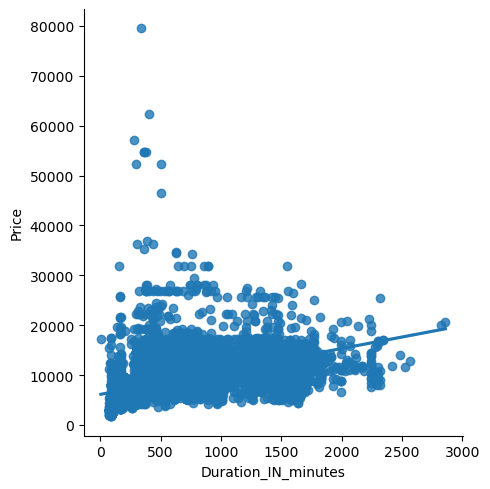

In [424]:
sns.lmplot(x="Duration_IN_minutes" , y="Price" , data=data)

### pretty clear that As the duration of minutes increases Flight price also increases.

In [425]:
### lets understand whether total stops affect price or not !

<Axes: xlabel='Duration_IN_minutes', ylabel='Price'>

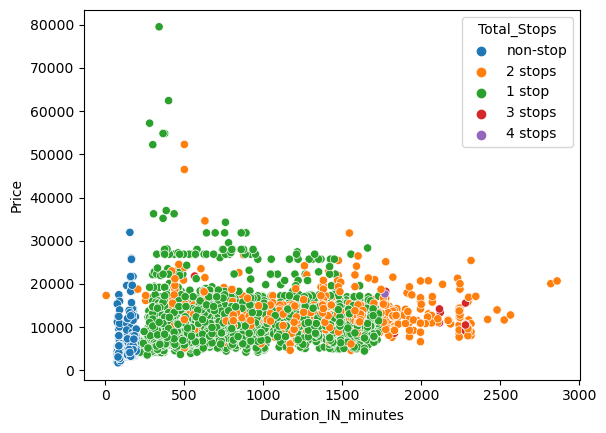

In [426]:
sns.scatterplot(x="Duration_IN_minutes" , y="Price" , data=data,hue='Total_Stops')

In [427]:
#### Non stops flights take less duration while their fare is also low, then as the stop increases, 
#### duration also increases and price also increases(in most of the cases)


# on which route Jet Airways is extremely used?

In [428]:
data[data['Airline']== 'Jet Airways'].groupby('Route').size().sort_values(ascending=False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

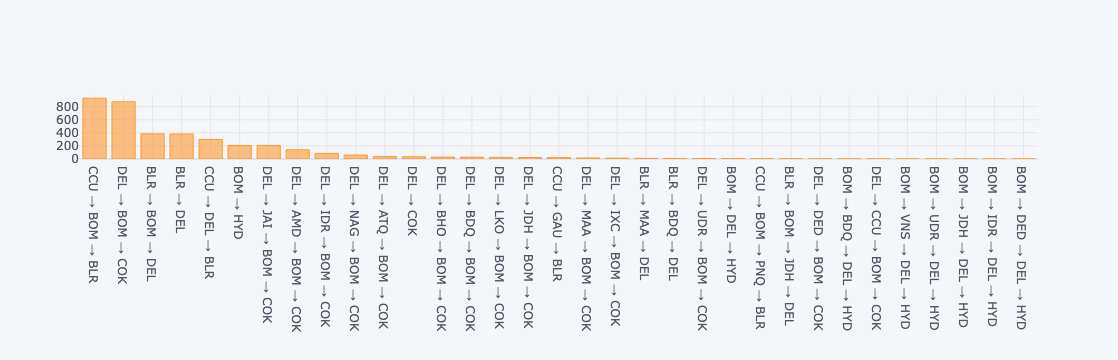

In [429]:
data[data['Airline']== 'Jet Airways'].groupby('Route').size().sort_values(ascending=False).iplot(kind= 'bar')

In [ ]:
# as we seen most of jet airways flights are useing CCU-BOM-BLR route (930)

# Performing Airline vs Price Analysis.

In [430]:
sns.boxplot(x='Airline', y = 'Price',data =data.sort_values('Price',ascending=False))
plt.xticks(rotation='vertical')
plt.show()

In [431]:
###Conclusion--> From graph we can see that Jet Airways Business have the highest Price., 
###              Apart from the first Airline almost all are having similar median


# Applying one-hot Encoding on data..

In [432]:
data.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Duration Total_Stops Additional_Info  Price  Journey_day  Journey_date  \
0   2h 50m    non-stop         No info   3897           24          2019   
1   7h 25m     2 stops         No info   7662            1          2019   

   Journey_month  Dep_Time_minutes  Dep_Time_hours  Arrival_Time_minutes  \
0              3                20              22                    10   
1              5                50               5                    15   

   Arrival_Time_hours  Duration_hours  Duration_minutes  Duration_IN_minutes  
0                   1               2                50                  170  
1                  13               7                25                  445

In [433]:
cat_col=[col for col in data.columns if data[col].dtype == 'object']

In [434]:
num_col=[col for col in data.columns if data[col].dtype != 'object']

In [435]:
cat_col

['Airline',
 'Source',
 'Destination',
 'Route',
 'Duration',
 'Total_Stops',
 'Additional_Info']

In [436]:
num_col

['Date_of_Journey',
 'Price',
 'Journey_day',
 'Journey_date',
 'Journey_month',
 'Dep_Time_minutes',
 'Dep_Time_hours',
 'Arrival_Time_minutes',
 'Arrival_Time_hours',
 'Duration_hours',
 'Duration_minutes',
 'Duration_IN_minutes']

In [437]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [438]:
for sub_source in data['Source'].unique():
    data['Source_' + sub_source] = data['Source'].apply(lambda x : 1 if x==sub_source else 0)
    

In [439]:
data.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Duration Total_Stops Additional_Info  Price  Journey_day  ...  \
0   2h 50m    non-stop         No info   3897           24  ...   
1   7h 25m     2 stops         No info   7662            1  ...   

   Arrival_Time_minutes  Arrival_Time_hours  Duration_hours  Duration_minutes  \
0                    10                   1               2                50   
1                    15                  13               7                25   

   Duration_IN_minutes  Source_Banglore  Source_Kolkata  Source_Delhi  \
0                  170                1               0             0   
1                  445                0               1             0   

   Source_Chennai  Source_Mumbai  
0               0              0  
1               0              0  

[2 rows x 24 columns]

#### As we seen we have Airline as a object data type and out ML model understand only numerical or verctor data so i have apply one hot encoding on airline, sourse and total stops.

In [440]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [441]:
data['Airline'].nunique()

12

In [442]:
airline = data.groupby(['Airline'])['Price'].mean().sort_values().index


In [443]:
airline

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [444]:
dict_airline={key:index for index, key in enumerate(airline,0)}

In [445]:
dict_airline

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [446]:
data['Airline'] = data['Airline'].map(dict_airline)

In [447]:
data.head(3)

Airline Date_of_Journey    Source Destination                  Route  \
0        3      2019-03-24  Banglore   New Delhi              BLR → DEL   
1        7      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2       10      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   

  Duration Total_Stops Additional_Info  Price  Journey_day  ...  \
0   2h 50m    non-stop         No info   3897           24  ...   
1   7h 25m     2 stops         No info   7662            1  ...   
2   19h 0m     2 stops         No info  13882            9  ...   

   Arrival_Time_minutes  Arrival_Time_hours  Duration_hours  Duration_minutes  \
0                    10                   1               2                50   
1                    15                  13               7                25   
2                    25                   4              19                 0   

   Duration_IN_minutes  Source_Banglore  Source_Kolkata  Source_Delhi  \
0                  170                1               0             0   
1                  445                0               1             0   
2                 1140                0               0             1   

   Source_Chennai  Source_Mumbai  
0               0              0  
1               0              0  
2               0              0  

[3 rows x 24 columns]

In [448]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [449]:
data['Destination'].replace('New Delhi','Delhi',inplace= True)

In [450]:
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [451]:
destination = data.groupby(['Destination'])['Price'].mean().sort_values().index


In [452]:
dict_distination = {key:index for index , key in enumerate(destination,0)}

In [453]:
dict_distination

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [454]:
data['Destination'] = data['Destination'].map(dict_distination)

In [455]:
data.head(2)

Airline Date_of_Journey    Source  Destination                  Route  \
0        3      2019-03-24  Banglore            2              BLR → DEL   
1        7      2019-05-01   Kolkata            3  CCU → IXR → BBI → BLR   

  Duration Total_Stops Additional_Info  Price  Journey_day  ...  \
0   2h 50m    non-stop         No info   3897           24  ...   
1   7h 25m     2 stops         No info   7662            1  ...   

   Arrival_Time_minutes  Arrival_Time_hours  Duration_hours  Duration_minutes  \
0                    10                   1               2                50   
1                    15                  13               7                25   

   Duration_IN_minutes  Source_Banglore  Source_Kolkata  Source_Delhi  \
0                  170                1               0             0   
1                  445                0               1             0   

   Source_Chennai  Source_Mumbai  
0               0              0  
1               0              0  

[2 rows x 24 columns]

In [456]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [457]:
dict_total_stops = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [458]:
data['Total_Stops'] = data['Total_Stops'].map(dict_total_stops)

In [459]:
data.head(2)

Airline Date_of_Journey    Source  Destination                  Route  \
0        3      2019-03-24  Banglore            2              BLR → DEL   
1        7      2019-05-01   Kolkata            3  CCU → IXR → BBI → BLR   

  Duration  Total_Stops Additional_Info  Price  Journey_day  ...  \
0   2h 50m            0         No info   3897           24  ...   
1   7h 25m            2         No info   7662            1  ...   

   Arrival_Time_minutes  Arrival_Time_hours  Duration_hours  Duration_minutes  \
0                    10                   1               2                50   
1                    15                  13               7                25   

   Duration_IN_minutes  Source_Banglore  Source_Kolkata  Source_Delhi  \
0                  170                1               0             0   
1                  445                0               1             0   

   Source_Chennai  Source_Mumbai  
0               0              0  
1               0              0  

[2 rows x 24 columns]

In [ ]:
# now we can seen we sucessfully converted airline, total_stops and source into numerical data

# Lets remove Un-necessary features

In [460]:
data['Additional_Info'].value_counts()/len(data)*100

Additional_Info
No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: count, dtype: float64

In [461]:
data.drop(['Date_of_Journey','Source','Route','Duration','Additional_Info',],axis=1,inplace=True)

In [462]:
data.head()

Airline  Destination  Total_Stops  Price  Journey_day  Journey_date  \
0        3            2            0   3897           24          2019   
1        7            3            2   7662            1          2019   
2       10            4            2  13882            9          2019   
3        3            3            1   6218           12          2019   
4        3            2            1  13302            1          2019   

   Journey_month  Dep_Time_minutes  Dep_Time_hours  Arrival_Time_minutes  \
0              3                20              22                    10   
1              5                50               5                    15   
2              6                25               9                    25   
3              5                 5              18                    30   
4              3                50              16                    35   

   Arrival_Time_hours  Duration_hours  Duration_minutes  Duration_IN_minutes  \
0                   1               2                50                  170   
1                  13               7                25                  445   
2                   4              19                 0                 1140   
3                  23               5                25                  325   
4                  21               4                45                  285   

   Source_Banglore  Source_Kolkata  Source_Delhi  Source_Chennai  \
0                1               0             0               0   
1                0               1             0               0   
2                0               0             1               0   
3                0               1             0               0   
4                1               0             0               0   

   Source_Mumbai  
0              0  
1              0  
2              0  
3              0  
4              0

In [463]:
data['Journey_date'].unique()

array([2019], dtype=int32)

In [464]:
data.drop('Journey_date',axis=1,inplace=True)

In [465]:
data.head()

Airline  Destination  Total_Stops  Price  Journey_day  Journey_month  \
0        3            2            0   3897           24              3   
1        7            3            2   7662            1              5   
2       10            4            2  13882            9              6   
3        3            3            1   6218           12              5   
4        3            2            1  13302            1              3   

   Dep_Time_minutes  Dep_Time_hours  Arrival_Time_minutes  Arrival_Time_hours  \
0                20              22                    10                   1   
1                50               5                    15                  13   
2                25               9                    25                   4   
3                 5              18                    30                  23   
4                50              16                    35                  21   

   Duration_hours  Duration_minutes  Duration_IN_minutes  Source_Banglore  \
0               2                50                  170                1   
1               7                25                  445                0   
2              19                 0                 1140                0   
3               5                25                  325                0   
4               4                45                  285                1   

   Source_Kolkata  Source_Delhi  Source_Chennai  Source_Mumbai  
0               0             0               0              0  
1               1             0               0              0  
2               0             1               0              0  
3               1             0               0              0  
4               0             0               0              0

In [466]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Airline               10682 non-null  int64
 1   Destination           10682 non-null  int64
 2   Total_Stops           10682 non-null  int64
 3   Price                 10682 non-null  int64
 4   Journey_day           10682 non-null  int32
 5   Journey_month         10682 non-null  int32
 6   Dep_Time_minutes      10682 non-null  int32
 7   Dep_Time_hours        10682 non-null  int32
 8   Arrival_Time_minutes  10682 non-null  int32
 9   Arrival_Time_hours    10682 non-null  int32
 10  Duration_hours        10682 non-null  int64
 11  Duration_minutes      10682 non-null  int64
 12  Duration_IN_minutes   10682 non-null  int64
 13  Source_Banglore       10682 non-null  int64
 14  Source_Kolkata        10682 non-null  int64
 15  Source_Delhi          10682 non-null  int64
 16  Source_Ch

## as we seen our data is sucessfully converted into in numerical form 

# Lets Perform outlier detection

In [467]:
data.head()

Airline  Destination  Total_Stops  Price  Journey_day  Journey_month  \
0        3            2            0   3897           24              3   
1        7            3            2   7662            1              5   
2       10            4            2  13882            9              6   
3        3            3            1   6218           12              5   
4        3            2            1  13302            1              3   

   Dep_Time_minutes  Dep_Time_hours  Arrival_Time_minutes  Arrival_Time_hours  \
0                20              22                    10                   1   
1                50               5                    15                  13   
2                25               9                    25                   4   
3                 5              18                    30                  23   
4                50              16                    35                  21   

   Duration_hours  Duration_minutes  Duration_IN_minutes  Source_Banglore  \
0               2                50                  170                1   
1               7                25                  445                0   
2              19                 0                 1140                0   
3               5                25                  325                0   
4               4                45                  285                1   

   Source_Kolkata  Source_Delhi  Source_Chennai  Source_Mumbai  
0               0             0               0              0  
1               1             0               0              0  
2               0             1               0              0  
3               1             0               0              0  
4               0             0               0              0

CAUSE FOR OUTLIERS
* Data Entry Errors:- Human errors such as errors caused during data collection, recording, or entry can cause outliers in data.
* Measurement Error:- It is the most common source of outliers. This is caused when the measurement instrument used turns out to be faulty.

In [468]:
def plot(df, col):
    fig , (ax1 , ax2 , ax3) = plt.subplots(3,1)
    
    sns.distplot(df[col] , ax=ax1)
    sns.boxplot(df[col] , ax=ax2,orient='h')
    sns.distplot(df[col] , ax=ax3 , kde=False)

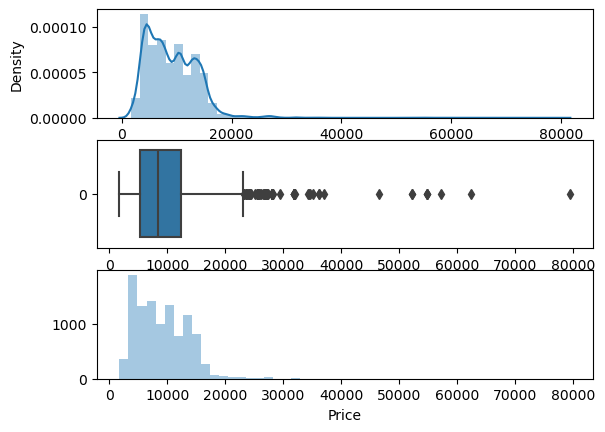

In [469]:
plot(data,'Price')

If Features Are Skewed We Use the below Technique which is IQR
    Data which are greater than IQR +1.5 IQR and data which are below than IQR - 1.5 IQR are my outliers
    where ,  IQR = 75th%ile data - 25th%ile data
     
     & IQR +- 1.5 IQR  will be changed depending upon the domain ie it could be sometimes IQR +- 3IQR 
      

In [470]:
q1 = data['Price'].quantile(0.25)
q3 = data['Price'].quantile(0.75)

iqr = q3- q1

maximum = q3 + 1.5*iqr
minimum = q1 - 1.5*iqr

In [471]:
print(maximum)

23017.0


In [472]:
print(minimum)

-5367.0


In [473]:
print([price for price in data['Price'] if price > maximum or price < minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [474]:
len([price for price in data['Price'] if price > maximum or price < minimum])

94

In [475]:
### wherever I have price >35K just replace replace it with median of Price
data['Price'] = np.where(data['Price']>=35000 , data['Price'].median() , data['Price'])

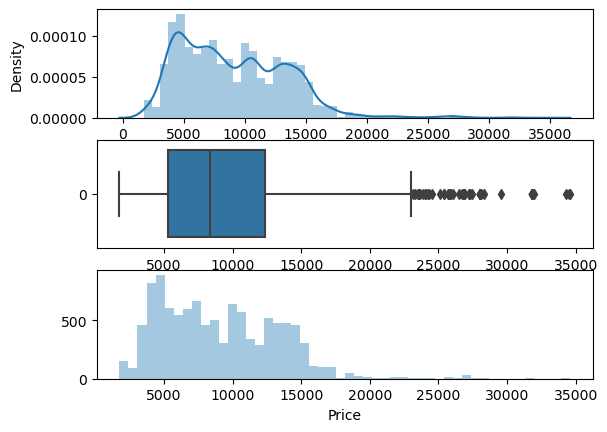

In [476]:
plot(data , 'Price')

##  Lets Perform feature selection



    : Feature Selection
    Finding out the best feature which will contribute and have good relation with target variable. 
    
    
    Q-> Why to apply Feature Selection?
    To select important features ie to get rid of curse of dimensionality ie..or to get rid of duplicate features
    

In [477]:
X = data.drop(['Price'],axis =1)

In [478]:
y = data['Price']

In [479]:
X

Airline  Destination  Total_Stops  Journey_day  Journey_month  \
0            3            2            0           24              3   
1            7            3            2            1              5   
2           10            4            2            9              6   
3            3            3            1           12              5   
4            3            2            1            1              3   
...        ...          ...          ...          ...            ...   
10678        2            3            0            9              4   
10679        7            3            0           27              4   
10680       10            2            0           27              4   
10681        5            2            0            1              3   
10682        7            4            2            9              5   

       Dep_Time_minutes  Dep_Time_hours  Arrival_Time_minutes  \
0                    20              22                    10   
1                    50               5                    15   
2                    25               9                    25   
3                     5              18                    30   
4                    50              16                    35   
...                 ...             ...                   ...   
10678                55              19                    25   
10679                45              20                    20   
10680                20               8                    20   
10681                30              11                    10   
10682                55              10                    15   

       Arrival_Time_hours  Duration_hours  Duration_minutes  \
0                       1               2                50   
1                      13               7                25   
2                       4              19                 0   
3                      23               5                25   
4                      21               4                45   
...                   ...             ...               ...   
10678                  22               2                30   
10679                  23               2                35   
10680                  11               3                 0   
10681                  14               2                40   
10682                  19               8                20   

       Duration_IN_minutes  Source_Banglore  Source_Kolkata  Source_Delhi  \
0                      170                1               0             0   
1                      445                0               1             0   
2                     1140                0               0             1   
3                      325                0               1             0   
4                      285                1               0             0   
...                    ...              ...             ...           ...   
10678                  150                0               1             0   
10679                  155                0               1             0   
10680                  180                1               0             0   
10681                  160                1               0             0   
10682                  500                0               0             1   

       Source_Chennai  Source_Mumbai  
0                   0              0  
1                   0              0  
2                   0              0  
3                   0              0  
4                   0              0  
...               ...            ...  
10678               0              0  
10679               0              0  
10680               0              0  
10681               0              0  
10682               0              0  

[10682 rows x 17 columns]

In [480]:
y

0         3897.0
1         7662.0
2        13882.0
3         6218.0
4        13302.0
          ...   
10678     4107.0
10679     4145.0
10680     7229.0
10681    12648.0
10682    11753.0
Name: Price, Length: 10682, dtype: float64

In [481]:
from sklearn.feature_selection import mutual_info_regression

In [482]:
imp_data = mutual_info_regression(X,y)

In [483]:
imp_data

array([0.98261871, 0.99776535, 0.78949197, 0.22625266, 0.62978552,
       0.25560975, 0.34659074, 0.34412707, 0.39923312, 0.4665446 ,
       0.33573108, 0.50170073, 0.39180393, 0.46338834, 0.52640202,
       0.14385837, 0.20166074])

In [484]:
df_mutual = pd.DataFrame(imp_data,index = X.columns)

In [485]:
df_mutual

0
Airline               0.982619
Destination           0.997765
Total_Stops           0.789492
Journey_day           0.226253
Journey_month         0.629786
Dep_Time_minutes      0.255610
Dep_Time_hours        0.346591
Arrival_Time_minutes  0.344127
Arrival_Time_hours    0.399233
Duration_hours        0.466545
Duration_minutes      0.335731
Duration_IN_minutes   0.501701
Source_Banglore       0.391804
Source_Kolkata        0.463388
Source_Delhi          0.526402
Source_Chennai        0.143858
Source_Mumbai         0.201661


Estimate mutual information for a continuous target variable.

Mutual information between two random variables is a non-negative
value, which measures the dependency between the variables. 
If It is equal to zero it means two random variables are independent, and higher
values mean higher dependency.



# Let build ML model

In [486]:
from sklearn.model_selection import train_test_split

In [487]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [488]:
from sklearn.ensemble import RandomForestRegressor

In [489]:
ml_model = RandomForestRegressor()

In [490]:
ml_model.fit(X_train,y_train)

RandomForestRegressor()

In [508]:
y_pridict = ml_model.predict(X_test)

In [492]:
y_pridict

array([16720.49,  5409.  ,  8849.83, ...,  3480.53,  6344.69,  6915.26])

In [493]:
from sklearn import metrics

In [494]:
metrics.r2_score(y_test,y_pridict)

0.8180162816582531

# lets save model

lets try to dump ml model using pickle or joblib..
advantage of dumping--
imagine in future we have new data & lets say we have to predict price on this huge data

then to do prediction on this new data , we can use this pre-trained model what we have dumped..

In [495]:
import pickle

In [496]:
file = open(r'rf_random.pkl','wb')

In [497]:
pickle.dump(ml_model,file)

In [498]:
model = open(r'rf_random.pkl','rb')

In [499]:
forest = pickle.load(model)

In [500]:
y_predict2 = forest.predict(X_test)

In [501]:
metrics.r2_score(y_test,y_predict2)

0.8180162816582531

#  Lets automate ml pipeline 

In [512]:
def predict(ml_model):
    model = ml_model.fit(X_train,y_train)
    print('Training Score = ',model.score(X_train,y_train))

    y_pridict = ml_model.predict(X_test)
    print("Prediction is : ",y_pridict)

    r2_score = metrics.r2_score(y_test,y_pridict)

    print('R2_Score is : ',r2_score )
    print('MAE : ',metrics.mean_absolute_error(y_test,y_pridict) )
    print('MAPE : ',metrics.mean_absolute_percentage_error(y_test,y_pridict) )
    print('MSE : ',metrics.mean_squared_error(y_test,y_pridict) )
    print('RMSE : ',np.sqrt(metrics.mean_squared_error(y_test,y_pridict) ))
    sns.displot(y_test-y_pridict)
    
    

Training Score =  0.9510010909863198
Prediction is :  [16892.36  5476.11  8844.23 ...  3603.98  6219.34  6854.15]
R2_Score is :  0.8171153678587684
MAE :  1167.9260964093937
MAPE :  0.13165344561081607
MSE :  3560324.8034849563
RMSE :  1886.8822971995248


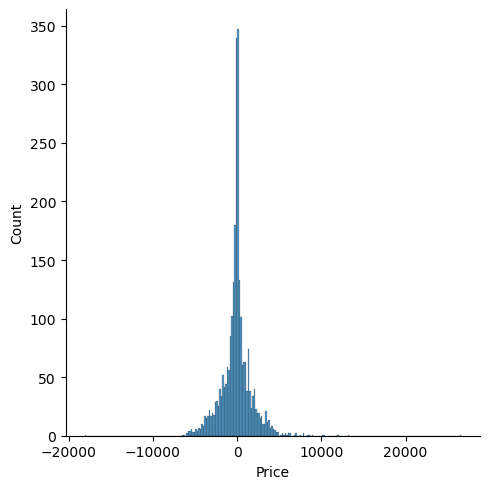

In [513]:
predict(RandomForestRegressor())

In [514]:
from sklearn.tree import DecisionTreeRegressor

Training Score =  0.966591628243878
Prediction is :  [16840.  4959.  8610. ...  3419.  5797.  6818.]
R2_Score is :  0.7355179306307252
MAE :  1340.3338325221516
MAPE :  0.15149709857541488
MSE :  5148831.045165564
RMSE :  2269.103577443208


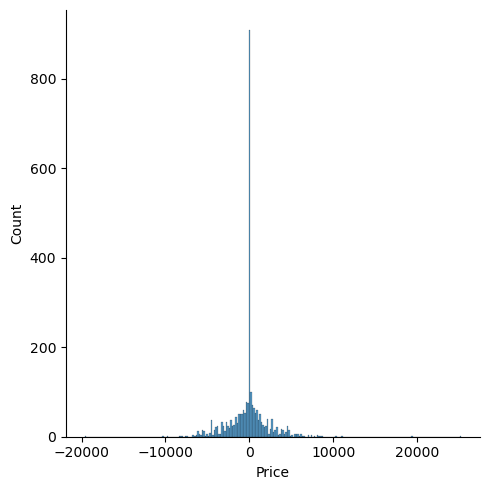

In [515]:
predict(DecisionTreeRegressor())

# The-End

### project by Rajat Kumar Pancholi